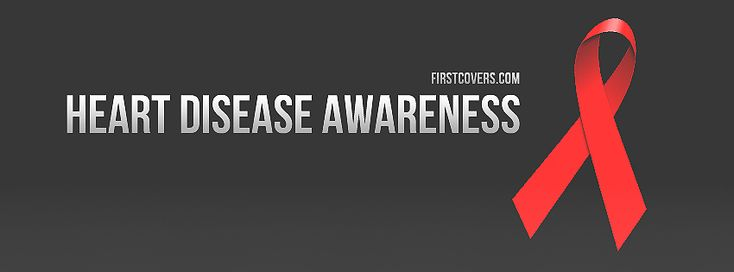

## Predicting heart Disease using Machine Learning
This notebook looks into various python-based Machine-learning and data science libraries in an attempt to build a machine learning model capable of prediciting weather someone has heart disease or not based on their medical attributes

##### The data came from cleveland data from UCI data repository 
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

## Evaluation
>If we reach 95% predicting rate weather a patient have a heart disease or not  then we will continue the project

## Features


Column Descriptions:

`id (Unique id for each patient).`

`age (Age of the patient in years).`

`origin (place of study).`

`sex (Male/Female).`

`cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic]).`

`trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)).`

`chol (serum cholesterol in mg/dl).`

`fbs (if fasting blood sugar > 120 mg/dl)`

`restecg (resting electrocardiographic results)`

`-- Values: [normal, stt abnormality, lv hypertrophy]`

`thalach: maximum heart rate achieved`

`exang: exercise-induced angina (True/ False)`

`oldpeak: ST depression induced by exercise relative to rest`

`slope: the slope of the peak exercise ST segment`

`ca: number of major vessels (0-3) colored by fluoroscopy`

`thal: [normal; fixed defect; reversible defect]`

`num: the predicted attribute`


## Prepare tools
Import all tools we need

In [34]:
# EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#(plot appear in notebook)
%matplotlib inline  

#Machine Learning libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# EVALUATION LIBRARIES
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [41]:
df=pd.read_csv("heart-disease.csv")

In [42]:
df.shape

(303, 14)

## Data Exploration ( Exploratory Data Analysis)
Goal :
    * Find more about data and become master of the subject
1. Questions we are trying to solve.
2. What kind of data we have and how we are going to treat different types
3. Whats missing and how we deal with it
4. Detect Outliers.
5. How to add , remove and change features to get most out of data

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [45]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

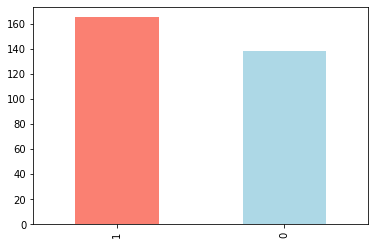

In [51]:
df.target.value_counts().plot(kind='bar',color=["salmon",'lightblue']);

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [54]:
### Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## HEART DISEASE frequency AGE to SEX

In [56]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [58]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


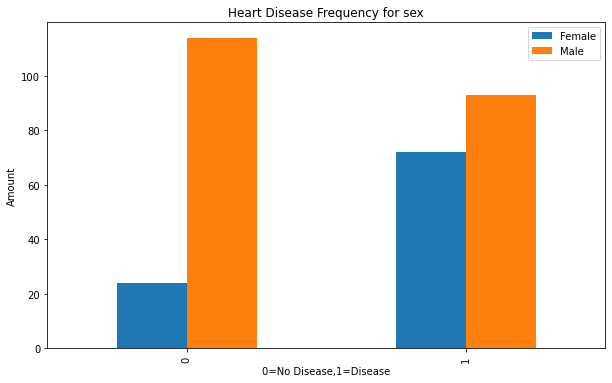

In [65]:
## Visualize it 
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6));
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])

## HEART DISEASE frequency AGE and THALACH to Target

In [66]:
df.chol.value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

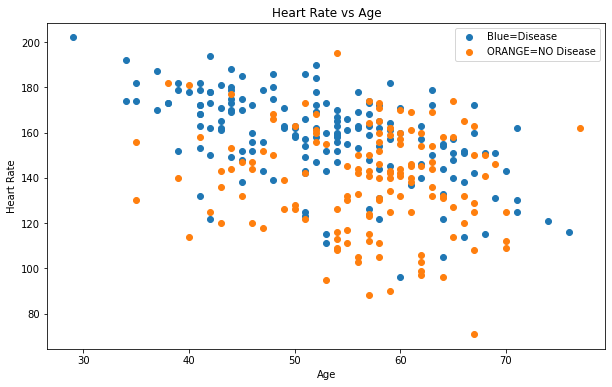

In [87]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df.age[df.target==1],
          df.thalach[df.target==1]);
ax.set(xlabel="Age",ylabel="Heart Rate",title="Heart Rate vs Age");
ax.scatter(df.age[df.target==0],
          df.thalach[df.target==0]);
ax.legend(["Blue=Disease","ORANGE=NO Disease"])

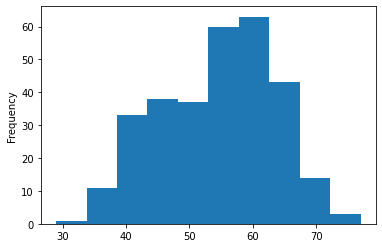

In [89]:
## Age Distribution
df.age.plot.hist();

## HEART DISEASE frequency TO CHEST PAIN

In [90]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [92]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


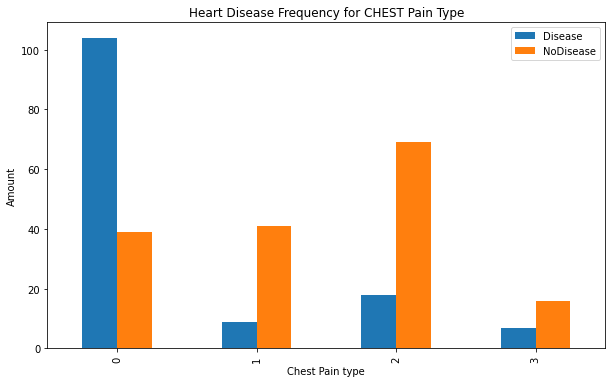

In [116]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6));
plt.title("Heart Disease Frequency for CHEST Pain Type")
plt.xlabel("Chest Pain type");
plt.ylabel("Amount");
plt.legend(["Disease","NoDisease"]);

In [117]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Make correlation Matrix

In [118]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


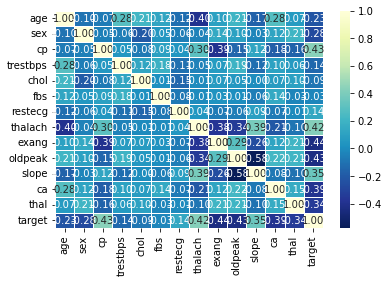

In [126]:
corr_matrix=df.corr();
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt="0.2f",
           cmap='YlGnBu_r',
           );


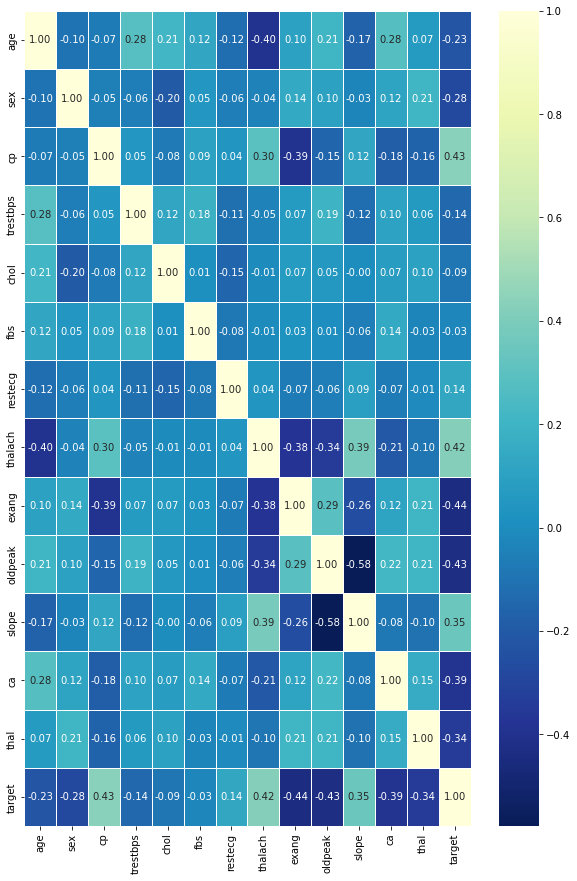

In [130]:
fig,ax=plt.subplots(figsize=(10,15))
ax=sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt="0.2f",
           cmap='YlGnBu_r',
           );

## Modelling

In [131]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [132]:
x=df.drop('target',axis=1)
y=df["target"]

In [133]:
x.shape,y.shape

((303, 13), (303,))

In [134]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [135]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [136]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

> We are going to use 3 models
1. Logistic Regression
2.K-Nearest Neighbour Classifier
3.Random Forest

In [159]:
models={
    "Logistic Regression": LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}
def fitandscore(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        # Evaluate model and append its scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [160]:
model_scores=fitandscore(models=models,X_train=x_train,X_test=x_test,y_train=y_train,y_test=y_test)

C:\Users\HP\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [161]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [162]:
## Model comparison

In [168]:
df2=pd.DataFrame(model_scores,index=["accuracy"])

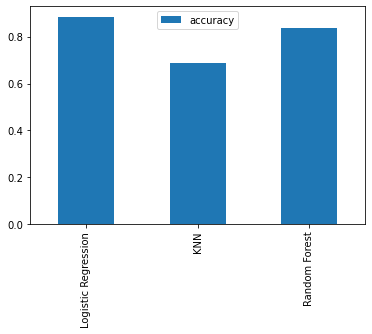

In [171]:
df2.T.plot.bar();

### Look at following :

1. Hyprer Param Tuning.
2. Feature Importance.
3. Confsuion Matrix
4. Precision score
5. Recall
6. Cross Validation
7. F1 score
8. Classification Report
9. ROC curve

## Hyper parameter Tuning

In [173]:
## lets tune KNN
train_scores=[]
test_scores=[]

# Create liost of different value of neighbours
neighbors=range(1,31)
knn=KNeighborsClassifier()
## loop through neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit algorithm
    knn.fit(x_train,y_train)
    ## update scores
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [174]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6735537190082644]

In [175]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869]

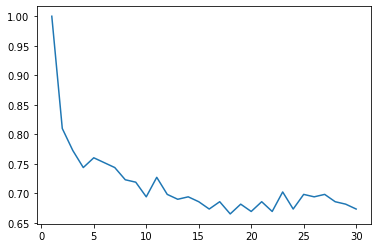

In [189]:
plt.plot(neighbors,train_scores,label="Train Score");


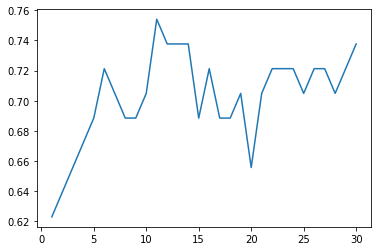

In [190]:
plt.plot(neighbors,test_scores,label="Test Score");


## Hyper Parameter Tuning by hand

### WE will use Randomized Search CV

In [212]:
##  Grid for Log REG
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
## Grid for Random Forest Classifier
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [206]:
np.random.seed(42)
## set grid for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),log_reg_grid,cv=5,n_iter=20,verbose=True)

In [207]:
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [208]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [209]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [213]:
## Tune Random forest Classifier
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),rf_grid,cv=5,n_iter=20,verbose=True)

In [214]:
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [215]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [216]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyper Parmeter using Grid search cv

In [225]:
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver":["liblinear"],
    "intercept_scaling":[1,2,3,4,5]
}
ga_logreg=GridSearchCV(LogisticRegression(),log_reg_grid,cv=5,verbose=True)

In [226]:
ga_logreg.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'intercept_scaling': [1, 2, 3, 4, 5],
                         'solver': ['liblinear']},
             verbose=True)

In [227]:
ga_logreg.best_params_

{'C': 0.20433597178569418, 'intercept_scaling': 5, 'solver': 'liblinear'}

In [228]:
ga_logreg.score(x_test,y_test)

0.8852459016393442

In [229]:
y_preds=ga_logreg.predict(x_test)

In [230]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\HP\Desktop\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


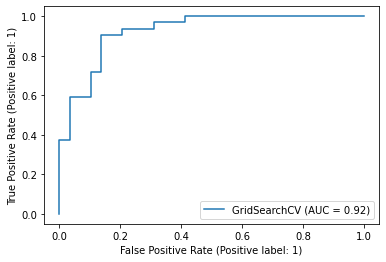

In [232]:
plot_roc_curve(ga_logreg,x_test,y_test);

In [234]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


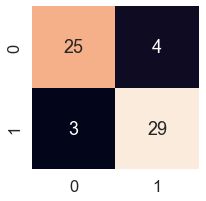

In [239]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
#     plt.xlabel("Predicted label") # predictions go on the x-axis
#     plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

## Classification Report

In [240]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [241]:
ga_logreg.best_params_

{'C': 0.20433597178569418, 'intercept_scaling': 5, 'solver': 'liblinear'}

In [244]:
clf=LogisticRegression(C= 0.20433597178569418, intercept_scaling=5,solver="liblinear")

## cross val scorings

In [262]:
acc_sc=cross_val_score(clf,x,y,scoring="accuracy",cv=5)
np.mean(acc_sc)

0.8413661202185793

In [263]:
prec_sc=cross_val_score(clf,x,y,scoring="precision",cv=5)
np.mean(prec_sc)

0.82

In [264]:
rec_sc=cross_val_score(clf,x,y,scoring='recall',cv=5)
np.mean(rec_sc)

0.9151515151515153

In [266]:
f1_sc=cross_val_score(clf,x,y,scoring="f1",cv=5)
np.mean(f1_sc)

0.86406124093473

## visualize cross val matrics

In [269]:
cv_metrics=pd.DataFrame({"Accuarcy":np.mean(acc_sc),
                       "Precision_Score":np.mean(prec_sc),
                       "Recall Score":np.mean(rec_sc),
                       "F1 Score":np.mean(f1_sc)},index=[0])

In [270]:
cv_metrics

,Accuarcy,Precision_Score,Recall Score,F1 Score
0,0.841366,0.82,0.915152,0.864061


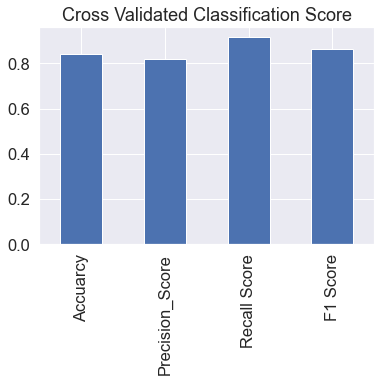

In [273]:
cv_metrics.T.plot.bar(title="Cross Validated Classification Score",legend=False);


## Feature Importance

>Feature importance is different for each machine learning model

In [274]:
clf=LogisticRegression(C= 0.20433597178569418, intercept_scaling=5,solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, intercept_scaling=5,
                   solver='liblinear')

In [275]:
clf.coef_

array([[-4.37537994e-04, -8.69493952e-01,  6.61597617e-01,
        -1.25613966e-02, -1.80438574e-03,  4.96397183e-02,
         3.04608840e-01,  2.26249478e-02, -6.14097263e-01,
        -5.75651439e-01,  4.43662812e-01, -6.36347959e-01,
        -6.91662530e-01]])

In [277]:
features_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [278]:
features_dict

{'age': -0.0004375379942765356,
 'sex': -0.8694939520794212,
 'cp': 0.6615976174524083,
 'trestbps': -0.012561396622309654,
 'chol': -0.0018043857447169794,
 'fbs': 0.049639718325753604,
 'restecg': 0.3046088396569281,
 'thalach': 0.022624947788451304,
 'exang': -0.614097263422732,
 'oldpeak': -0.575651439487042,
 'slope': 0.443662812488912,
 'ca': -0.6363479589834827,
 'thal': -0.6916625304063412}

In [279]:
features_df=pd.DataFrame(features_dict,index=[0])

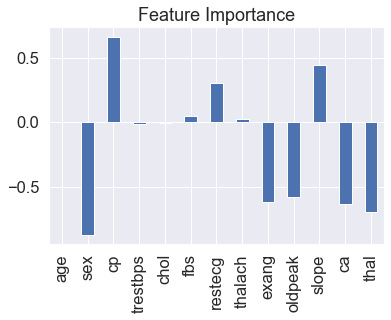

In [281]:
features_df.T.plot.bar(title="Feature Importance",legend=False);